In [1]:

!pip install roboflow
!pip install ultralytics
from roboflow import Roboflow
rf = Roboflow(api_key="GojoMvCjgAWvG6j6hFe8")
project = rf.workspace("project-x2uaa").project("employee-performance-monitoring")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 28.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Employee-Performance-Monitoring-4 in yolov8:: 100%|██████████| 5368/5368 [00:03<00:00, 1538.92it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install albumentations==1.4
!pip install ultralytics==8.2.50
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.7 MB/s eta 0:00:00


In [2]:
import torch
from ultralytics import YOLO
from PIL import Image
from roboflow import Roboflow
model = YOLO('yolov8n.pt')


100%|██████████| 6.25M/6.25M [00:00<00:00, 113MB/s]


In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="EfACV3lp7ZlOJbQ0Cm5k")
project = rf.workspace("dmsoffice").project("worker-activity-detection")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Worker-Activity-Detection-2 in yolov8:: 100%|██████████| 1534/1534 [00:00<00:00, 6153.94it/s]


In [4]:

from roboflow import Roboflow
rf = Roboflow(api_key="EfACV3lp7ZlOJbQ0Cm5k")
project = rf.workspace("project-x2uaa").project("employee-performance-monitoring")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Employee-Performance-Monitoring-1 in yolov8:: 100%|██████████| 954/954 [00:00<00:00, 5481.44it/s]


In [5]:
import os
import shutil

def filter_labels_with_class(input_folder_labels, input_folder_images, output_folder_labels, output_folder_images, class_number):
    """
    Filter label files that have annotations for a specific class and copy the corresponding images and labels to new folders.

    Args:
    - input_folder_labels (str): Path to the folder containing label files.
    - input_folder_images (str): Path to the folder containing image files.
    - output_folder_labels (str): Path to the folder where filtered label files will be saved.
    - output_folder_images (str): Path to the folder where filtered image files will be saved.
    - class_number (int): The class number to filter for.
    """
    # Create the output folders if they don't exist
    os.makedirs(output_folder_labels, exist_ok=True)
    os.makedirs(output_folder_images, exist_ok=True)

    # Iterate over all label files in the input folder
    for filename in os.listdir(input_folder_labels):
        label_file = os.path.join(input_folder_labels, filename)
        image_file = os.path.join(input_folder_images, os.path.splitext(filename)[0] + '.jpg')

        # Read the label file and filter out lines that contain annotations for the specified class
        filtered_lines = []
        with open(label_file, 'r') as f:
            for line in f:
                label, *values = line.split()
                if int(label) == class_number:
                    filtered_lines.append(line)

        # If there are no annotations for the specified class, skip this file
        if not filtered_lines:
            continue

        # Write the filtered lines to the output label file
        output_label_file = os.path.join(output_folder_labels, filename)
        with open(output_label_file, 'w') as f:
            f.writelines(filtered_lines)

        # Copy the image file to the output folder
        output_image_file = os.path.join(output_folder_images, os.path.basename(image_file))
        shutil.copy(image_file, output_image_file)





In [6]:

# Define the folder configurations as a list of dictionaries
folder_configs = [
    {
        "input_folder_labels": '/content/Worker-Activity-Detection-2/train/labels',
        "input_folder_images": '/content/Worker-Activity-Detection-2/train/images',
        "output_folder_labels": '/content/working/Worker/train/labels',
        "output_folder_images": '/content/working/Worker/train/images',
    },
    {
        "input_folder_labels": '/content/Worker-Activity-Detection-2/valid/labels',
        "input_folder_images": '/content/Worker-Activity-Detection-2/valid/images',
        "output_folder_labels": '/content/working/Worker/valid/labels',
        "output_folder_images": '/content/working/Worker/valid/images',
    },
    {
        "input_folder_labels": '/content/Worker-Activity-Detection-2/test/labels',
        "input_folder_images": '/content/Worker-Activity-Detection-2/test/images',
        "output_folder_labels": '/content/working/Worker/test/labels',
        "output_folder_images": '/content/working/Worker/test/images',
    }
]

# Class numbers to filter
class_numbers = [0, 1, 4, 5, 6, 7]

# Loop through each folder configuration and apply the function for each class number
for config in folder_configs:
    for class_number in class_numbers:
        # Call the function with each class number
        filter_labels_with_class(
            config["input_folder_labels"],
            config["input_folder_images"],
            config["output_folder_labels"],
            config["output_folder_images"],
            class_number
        )


In [7]:
import os

def change_class_number_in_labels(labels_folder, old_class_number, new_class_number):
    """
    Change the class number in all label files within the specified folder.

    Args:
    - labels_folder (str): Path to the folder containing label files.
    - old_class_number (int): The class number to be replaced.
    - new_class_number (int): The new class number.
    """
    # Iterate over all label files in the folder
    for filename in os.listdir(labels_folder):
        label_file = os.path.join(labels_folder, filename)

        # Read the contents of the label file
        with open(label_file, 'r') as f:
            lines = f.readlines()

        # Replace the old class number with the new class number in each line
        modified_lines = []
        for line in lines:
            label, *values = line.split()
            if int(label) == old_class_number:
                line = f"{new_class_number} {' '.join(values)}\n"
            modified_lines.append(line)

        # Write the modified contents back to the label file
        with open(label_file, 'w') as f:
            f.writelines(modified_lines)



In [8]:
# List of label folders to process
label_folders = [
    '/content/working/Worker/train/labels',
    '/content/working/Worker/valid/labels',
    '/content/working/Worker/test/labels'
]

# Old and new class numbers
old_class_numbers = [4, 5, 6, 7]
new_class_numbers = [2, 3, 4, 5]

# Loop through each label folder
for labels_folder in label_folders:
    # Loop through each pair of old and new class numbers
    for old_class, new_class in zip(old_class_numbers, new_class_numbers):
        change_class_number_in_labels(labels_folder, old_class, new_class)

In [9]:
classes = {
    0: 'At-Desk-NotWorking',
    1: 'At-Desk-Working',
    2: 'Sleeping',
    3: 'Standing-NotWorking',
    4: 'Standing-Working',
    5: 'Walking',
}

In [10]:
classes = [
'At-Desk-NotWorking',
'At-Desk-Working',
'Sleeping',
'Standing-NotWorking',
'Standing-Working',
'Walking',
          ]

In [11]:
import yaml

data = {
    'names': classes,
    'nc': len(classes),  # Use the length of classes
    'train': [
        '/content/working/Worker/train/images',

        '/content/Employee-Performance-Monitoring-4/train/images',

    ],
    'val': [
        '/content/working/Worker/valid/images',
        '/content/Employee-Performance-Monitoring-4/valid/images',

    ]
}

# Write the data dictionary to a YAML file
with open('/content/Employee-Performance-Monitoring-4/data.yaml', 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

In [12]:
import os
os.environ["WANDB_API_KEY"] = "80f989087c98dbd9f594bdcb65c26423f93f7267"

In [13]:
import gc

# Run garbage collection
gc.collect()


9

In [15]:
import torch

# Define a custom YOLO class that inherits from the original YOLO class
class CustomYOLO(YOLO):
    def __init__(self, *args, **kwargs):
        super(CustomYOLO, self).__init__(*args, **kwargs)

        self.additional_layer = torch.nn.Conv2d(
            in_channels=1024,  # Adjust according to the previous layer's output channels
            out_channels=512,   # Number of output channels you want
            kernel_size=3,      # Kernel size
            stride=1,           # Stride
            padding=1           # Padding
        )

        self.batch_norm = torch.nn.BatchNorm2d(512)
        self.additional_layer = torch.nn.Conv2d(
            in_channels=512,  # Adjust according to the previous layer's output channels
            out_channels=256,   # Number of output channels you want
            kernel_size=3,      # Kernel size
            stride=1,           # Stride
            padding=1           # Padding
        )

        self.batch_norm = torch.nn.BatchNorm2d(256)
        self.additional_layer = torch.nn.Conv2d(
            in_channels=256,  # Adjust according to the previous layer's output channels
            out_channels=128,   # Number of output channels you want
            kernel_size=3,      # Kernel size
            stride=1,           # Stride
            padding=1           # Padding
        )

        # Example: If you want to add a BatchNorm layer
        self.batch_norm = torch.nn.BatchNorm2d(128)
    def forward(self, x):
        # Pass through original layers
        x = super(CustomYOLO, self).forward(x)

        # Add new layers to the forward pass
        x = self.additional_layer(x)
        x = self.batch_norm(x)
        x = torch.relu(x)  # Applying an activation function

        return x

# Check if CUDA is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the modified model
model = CustomYOLO('yolov8n.pt').to(device)  # Load the pretrained model onto the device

# Train the model
yolo = model.train(
    data='/content/Employee-Performance-Monitoring-4/data.yaml',
    epochs=100,
    batch=32,
    imgsz=640,   # Update image size
    device=device,
    workers=0,   # Set workers to 0 for single-threaded data loading
    amp=False    # Disable Automatic Mixed Precision if needed
)


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Employee-Performance-Monitoring-4/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=0, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 18.4MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Employee-Performance-Monitoring-4/train/labels... 2999 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2999/2999 [00:01<00:00, 1875.74it/s]


train: New cache created: /content/Employee-Performance-Monitoring-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Employee-Performance-Monitoring-4/valid/labels... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<00:00, 1994.52it/s]

val: New cache created: /content/Employee-Performance-Monitoring-4/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.29G      1.863      2.949      1.591        124        640: 100%|██████████| 94/94 [01:35<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]

                   all        209        988      0.454      0.285       0.28      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.42G      1.728      2.019       1.49        100        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        209        988      0.622      0.486      0.476      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.21G      1.673      1.753      1.436        151        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        209        988      0.373      0.367      0.366      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.28G      1.677      1.626      1.443        150        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        209        988      0.571      0.415      0.492      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.43G      1.644      1.518      1.416        118        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        209        988      0.535      0.547      0.537      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.28G      1.587      1.383      1.391        153        640: 100%|██████████| 94/94 [01:30<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        209        988      0.662      0.572       0.61      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.57G      1.567      1.338      1.379        154        640: 100%|██████████| 94/94 [01:32<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        209        988      0.676      0.636       0.64      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       7.2G      1.546      1.266      1.366        182        640: 100%|██████████| 94/94 [01:30<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        209        988      0.622      0.585      0.631      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.26G      1.534       1.22      1.362        140        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        209        988      0.676      0.523      0.597      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.45G      1.505      1.184      1.342        123        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        209        988      0.875      0.558      0.679      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.47G      1.483      1.136       1.33         89        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        209        988      0.836      0.527      0.657      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.48G      1.463      1.119      1.324        151        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        209        988      0.661      0.606       0.67      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       7.3G      1.449      1.086      1.314        149        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        209        988      0.704      0.609      0.651       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.19G      1.434      1.068      1.307        116        640: 100%|██████████| 94/94 [01:31<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.676      0.668      0.691      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.42G      1.429      1.057      1.299        153        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        209        988      0.782      0.623      0.706      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.42G      1.416      1.047      1.303        117        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        209        988       0.64      0.756      0.729      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.46G      1.386     0.9987      1.278        145        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        209        988      0.688      0.699       0.73      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.19G       1.39     0.9915      1.286        133        640: 100%|██████████| 94/94 [01:31<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988      0.715      0.669      0.726      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.42G      1.365     0.9753       1.27        120        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        209        988      0.705      0.711      0.723      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       7.2G      1.363     0.9767      1.275        103        640: 100%|██████████| 94/94 [01:32<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        209        988      0.718      0.756      0.758      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.42G      1.358     0.9645      1.265        175        640: 100%|██████████| 94/94 [01:34<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        209        988      0.763      0.667      0.737      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.42G      1.348     0.9394      1.258        114        640: 100%|██████████| 94/94 [01:32<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        209        988      0.721      0.716      0.767      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.42G      1.347     0.9334      1.262        138        640: 100%|██████████| 94/94 [01:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        209        988      0.743      0.702      0.748      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       7.2G      1.314     0.8931       1.24        125        640: 100%|██████████| 94/94 [01:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        209        988      0.684       0.74      0.742      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.55G       1.31     0.9114      1.246        137        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988      0.741      0.723      0.758      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.27G       1.32     0.8956      1.246        137        640: 100%|██████████| 94/94 [01:32<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988      0.806      0.694      0.766      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       7.5G      1.297     0.8865      1.233        128        640: 100%|██████████| 94/94 [01:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        209        988      0.751      0.743      0.792      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.29G      1.278     0.8595      1.221        129        640: 100%|██████████| 94/94 [01:31<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        209        988      0.804      0.751      0.779      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.51G      1.278     0.8632      1.229        108        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        209        988      0.758      0.745      0.789      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.42G      1.274     0.8549      1.217         87        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        209        988      0.749      0.739      0.759       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.48G      1.256     0.8448       1.21        118        640: 100%|██████████| 94/94 [01:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        209        988      0.738       0.76      0.786      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.19G      1.247      0.838      1.207        129        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        209        988      0.756       0.73      0.767      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.42G      1.255     0.8358      1.208        119        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        209        988      0.807       0.74      0.799      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.42G      1.249     0.8257      1.208        152        640: 100%|██████████| 94/94 [01:32<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        209        988      0.796      0.748      0.813      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.46G      1.243     0.8207        1.2        130        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        209        988      0.785       0.76      0.798      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.47G      1.235     0.8133      1.197        124        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.772      0.714      0.774      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.42G      1.227     0.8116        1.2        167        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        209        988      0.782      0.753      0.789      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.48G      1.215     0.7979      1.187        134        640: 100%|██████████| 94/94 [01:32<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        209        988       0.74      0.766      0.778      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       7.2G      1.209     0.7936      1.175        108        640: 100%|██████████| 94/94 [01:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        209        988      0.735      0.788      0.792      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.29G      1.193     0.7789      1.176         84        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        209        988      0.732      0.787      0.789      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.47G      1.205     0.7788      1.187        117        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988       0.79      0.761      0.784      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.48G      1.199     0.7812      1.184        111        640: 100%|██████████| 94/94 [01:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988      0.794      0.764      0.803      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.19G      1.184     0.7741      1.175         95        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.33it/s]

                   all        209        988      0.777      0.752      0.788      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       7.2G       1.19     0.7657      1.176        131        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.743       0.77      0.806      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       7.5G      1.184     0.7707      1.172        130        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        209        988      0.776      0.765      0.785      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.28G      1.172     0.7409      1.159        110        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        209        988      0.735      0.814      0.805      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.19G      1.167     0.7471      1.165        153        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        209        988      0.806      0.743      0.798      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.46G      1.163     0.7421       1.16        118        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        209        988       0.78      0.744      0.776      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.21G      1.158     0.7514      1.156        138        640: 100%|██████████| 94/94 [01:31<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.774       0.76      0.785      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.42G      1.144     0.7334      1.151        124        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        209        988      0.779      0.768      0.819      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       7.5G      1.135     0.7205      1.146        125        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.721      0.801      0.816       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.28G      1.138     0.7299      1.148        110        640: 100%|██████████| 94/94 [01:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988      0.793      0.806      0.816      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.47G      1.127     0.7271      1.147        189        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        209        988      0.769      0.817      0.832      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.42G      1.129     0.7146      1.147        120        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.789       0.76      0.794      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.48G      1.122     0.7072      1.141        143        640: 100%|██████████| 94/94 [01:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.778      0.796      0.824      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.55G      1.119     0.7132      1.141        138        640: 100%|██████████| 94/94 [01:31<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        209        988       0.77      0.794      0.818      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.29G      1.113     0.7113      1.134        106        640: 100%|██████████| 94/94 [01:31<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.821      0.771      0.822      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.19G      1.104     0.6953       1.13        114        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        209        988      0.793      0.798      0.843      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.21G      1.101     0.6881      1.128        147        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        209        988      0.778      0.791      0.839      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.58G      1.087     0.6821       1.12        126        640: 100%|██████████| 94/94 [01:32<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        209        988      0.793      0.811      0.845      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       7.2G      1.095     0.6878      1.125        109        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        209        988      0.795      0.766      0.843       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.47G      1.086     0.6856       1.12        160        640: 100%|██████████| 94/94 [01:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988      0.815        0.8      0.842      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.29G      1.073     0.6703      1.113        125        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        209        988      0.784      0.795      0.817      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.48G      1.062     0.6708      1.112        147        640: 100%|██████████| 94/94 [01:29<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.808      0.782      0.843      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.48G       1.08     0.6786      1.117        115        640: 100%|██████████| 94/94 [01:35<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        209        988      0.772      0.827      0.836      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.26G      1.068     0.6602      1.113        133        640: 100%|██████████| 94/94 [01:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        209        988      0.839       0.78      0.852      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.46G      1.062     0.6659      1.111        140        640: 100%|██████████| 94/94 [01:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        209        988      0.812      0.809      0.837      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.42G      1.059     0.6625      1.108        117        640: 100%|██████████| 94/94 [01:35<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        209        988      0.802      0.772      0.834      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.48G      1.043     0.6562        1.1        112        640: 100%|██████████| 94/94 [01:38<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        209        988      0.772      0.799      0.828      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.26G      1.042     0.6522      1.104        148        640: 100%|██████████| 94/94 [01:37<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        209        988      0.774      0.814      0.845      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.21G      1.043     0.6471      1.102         99        640: 100%|██████████| 94/94 [01:37<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        209        988       0.77      0.773      0.841       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.42G      1.025     0.6417      1.095        183        640: 100%|██████████| 94/94 [01:35<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        209        988      0.754      0.823      0.832      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.28G      1.037     0.6475      1.101        155        640: 100%|██████████| 94/94 [01:36<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        209        988      0.783      0.761      0.815      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.48G       1.02     0.6381      1.094        139        640: 100%|██████████| 94/94 [01:39<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        209        988      0.773      0.812      0.834      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.46G      1.026     0.6374      1.095         87        640: 100%|██████████| 94/94 [01:43<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        209        988      0.774      0.818      0.834      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.47G      1.016     0.6265      1.085         94        640: 100%|██████████| 94/94 [01:43<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        209        988      0.785      0.803      0.835      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.29G      1.011     0.6281      1.092        165        640: 100%|██████████| 94/94 [01:43<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        209        988       0.79      0.821      0.845      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.47G      1.005     0.6233      1.084        110        640: 100%|██████████| 94/94 [01:45<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        209        988      0.781      0.809      0.837      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.47G      1.002     0.6151       1.08        120        640: 100%|██████████| 94/94 [01:45<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        209        988       0.78      0.828      0.835      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.21G      0.999     0.6189      1.083        162        640: 100%|██████████| 94/94 [01:43<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        209        988      0.777       0.82      0.839      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.19G     0.9949     0.6149      1.081        146        640: 100%|██████████| 94/94 [01:41<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        209        988      0.817      0.785       0.84      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.47G     0.9844     0.6073      1.075        155        640: 100%|██████████| 94/94 [01:41<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        209        988      0.788       0.82      0.843      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.21G     0.9933      0.608      1.075        138        640: 100%|██████████| 94/94 [01:44<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        209        988      0.811      0.823      0.854      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.21G     0.9846     0.6159      1.072        105        640: 100%|██████████| 94/94 [01:38<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        209        988      0.819      0.753      0.831      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       7.2G     0.9889     0.6055      1.075        154        640: 100%|██████████| 94/94 [01:39<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        209        988      0.801      0.803      0.839      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.47G     0.9726     0.6077      1.069         93        640: 100%|██████████| 94/94 [01:41<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        209        988      0.772      0.817      0.843      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.42G     0.9693     0.5945      1.071        141        640: 100%|██████████| 94/94 [01:36<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        209        988      0.812      0.778      0.847      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.21G     0.9649     0.5968      1.068        190        640: 100%|██████████| 94/94 [01:36<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        209        988       0.77      0.812      0.843      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.21G     0.9631     0.5913      1.064        114        640: 100%|██████████| 94/94 [01:43<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        209        988      0.786      0.794      0.838      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.19G     0.9474     0.5912      1.059        116        640: 100%|██████████| 94/94 [01:40<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        209        988      0.793      0.806      0.842      0.574


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.46G     0.8963     0.5094      1.051         98        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        209        988      0.783      0.794      0.833      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.46G     0.8753     0.4983      1.041         99        640: 100%|██████████| 94/94 [01:32<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        209        988      0.782      0.805      0.833      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.46G     0.8658     0.4876      1.039         83        640: 100%|██████████| 94/94 [01:30<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        209        988       0.78      0.802      0.834      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.42G     0.8589     0.4857      1.035        104        640: 100%|██████████| 94/94 [01:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        209        988      0.776      0.822      0.835      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.46G     0.8619     0.4873      1.032         68        640: 100%|██████████| 94/94 [01:36<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        209        988      0.769      0.817      0.831      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.46G     0.8534     0.4799      1.031         74        640: 100%|██████████| 94/94 [01:39<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        209        988      0.754      0.827      0.839       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.46G     0.8481     0.4795       1.03        110        640: 100%|██████████| 94/94 [01:37<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        209        988      0.757      0.834      0.843      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.46G      0.838     0.4725      1.025        111        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        209        988      0.781       0.82      0.847      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.46G      0.838     0.4766      1.023         79        640: 100%|██████████| 94/94 [01:31<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        209        988      0.772      0.815      0.844      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.46G     0.8323     0.4715      1.025         55        640: 100%|██████████| 94/94 [01:31<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        209        988      0.766      0.822      0.849      0.579



100 epochs completed in 2.715 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all        209        988      0.812      0.822      0.854      0.585
    At-Desk-NotWorking         25         44      0.522      0.659      0.596      0.404
       At-Desk-Working        137        732      0.854      0.936      0.951      0.641
              Sleeping         15         15      0.913          1      0.991      0.689
   Standing-NotWorking         74        115      0.713      0.826      0.838      0.497
      Standing-Working         32         44      0.869      0.795      0.856      0.618
               Walking         38         38          1      0.718      0.893      0.658
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train2


In [16]:
import gc

# Run garbage collection
gc.collect()


10

In [17]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Employee-Performance-Monitoring-4/valid/labels.cache... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


                   all        209        988      0.812      0.822      0.854      0.585
    At-Desk-NotWorking         25         44      0.522      0.659      0.596      0.404
       At-Desk-Working        137        732      0.854      0.936      0.951      0.641
              Sleeping         15         15      0.913          1      0.991      0.689
   Standing-NotWorking         74        115      0.713      0.826      0.838      0.497
      Standing-Working         32         44      0.869      0.795      0.856      0.618
               Walking         38         38          1      0.718      0.893      0.658
Speed: 0.3ms preprocess, 4.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train22


array([    0.40449,     0.64096,     0.68925,     0.49687,     0.61806,     0.65821])

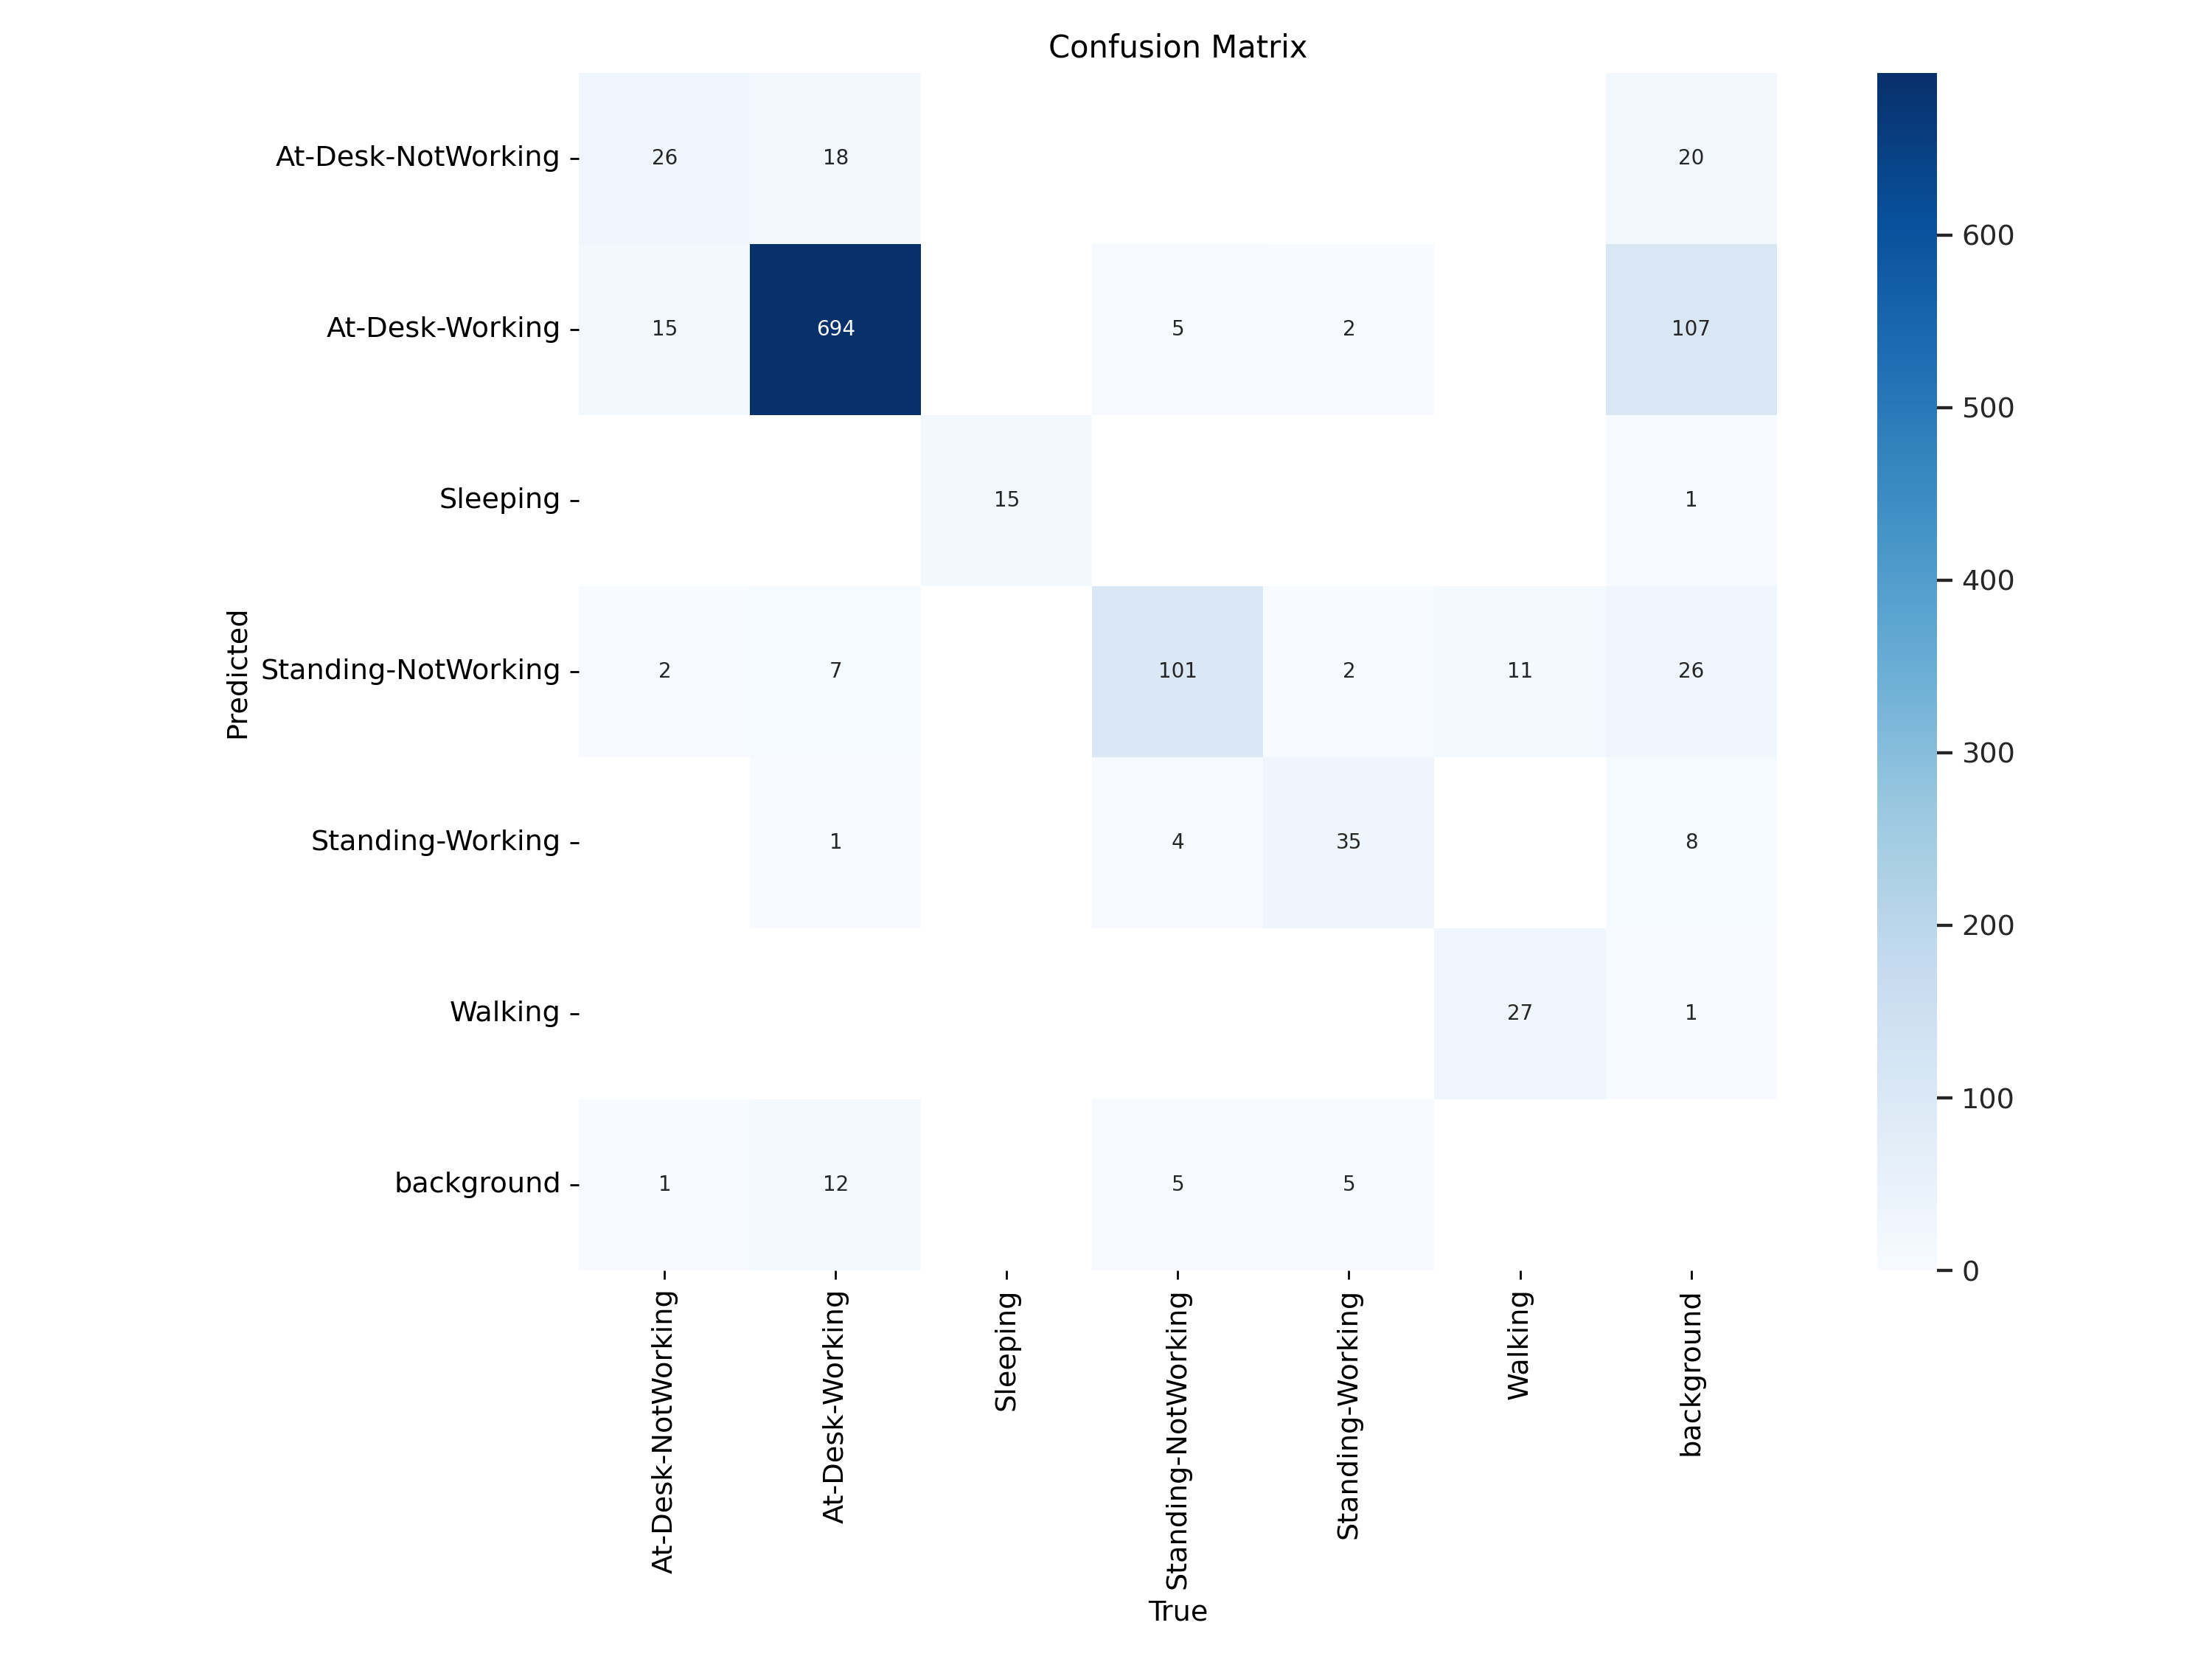

In [28]:
from PIL import Image
Image.open("/content/runs/detect/train2/confusion_matrix.png")

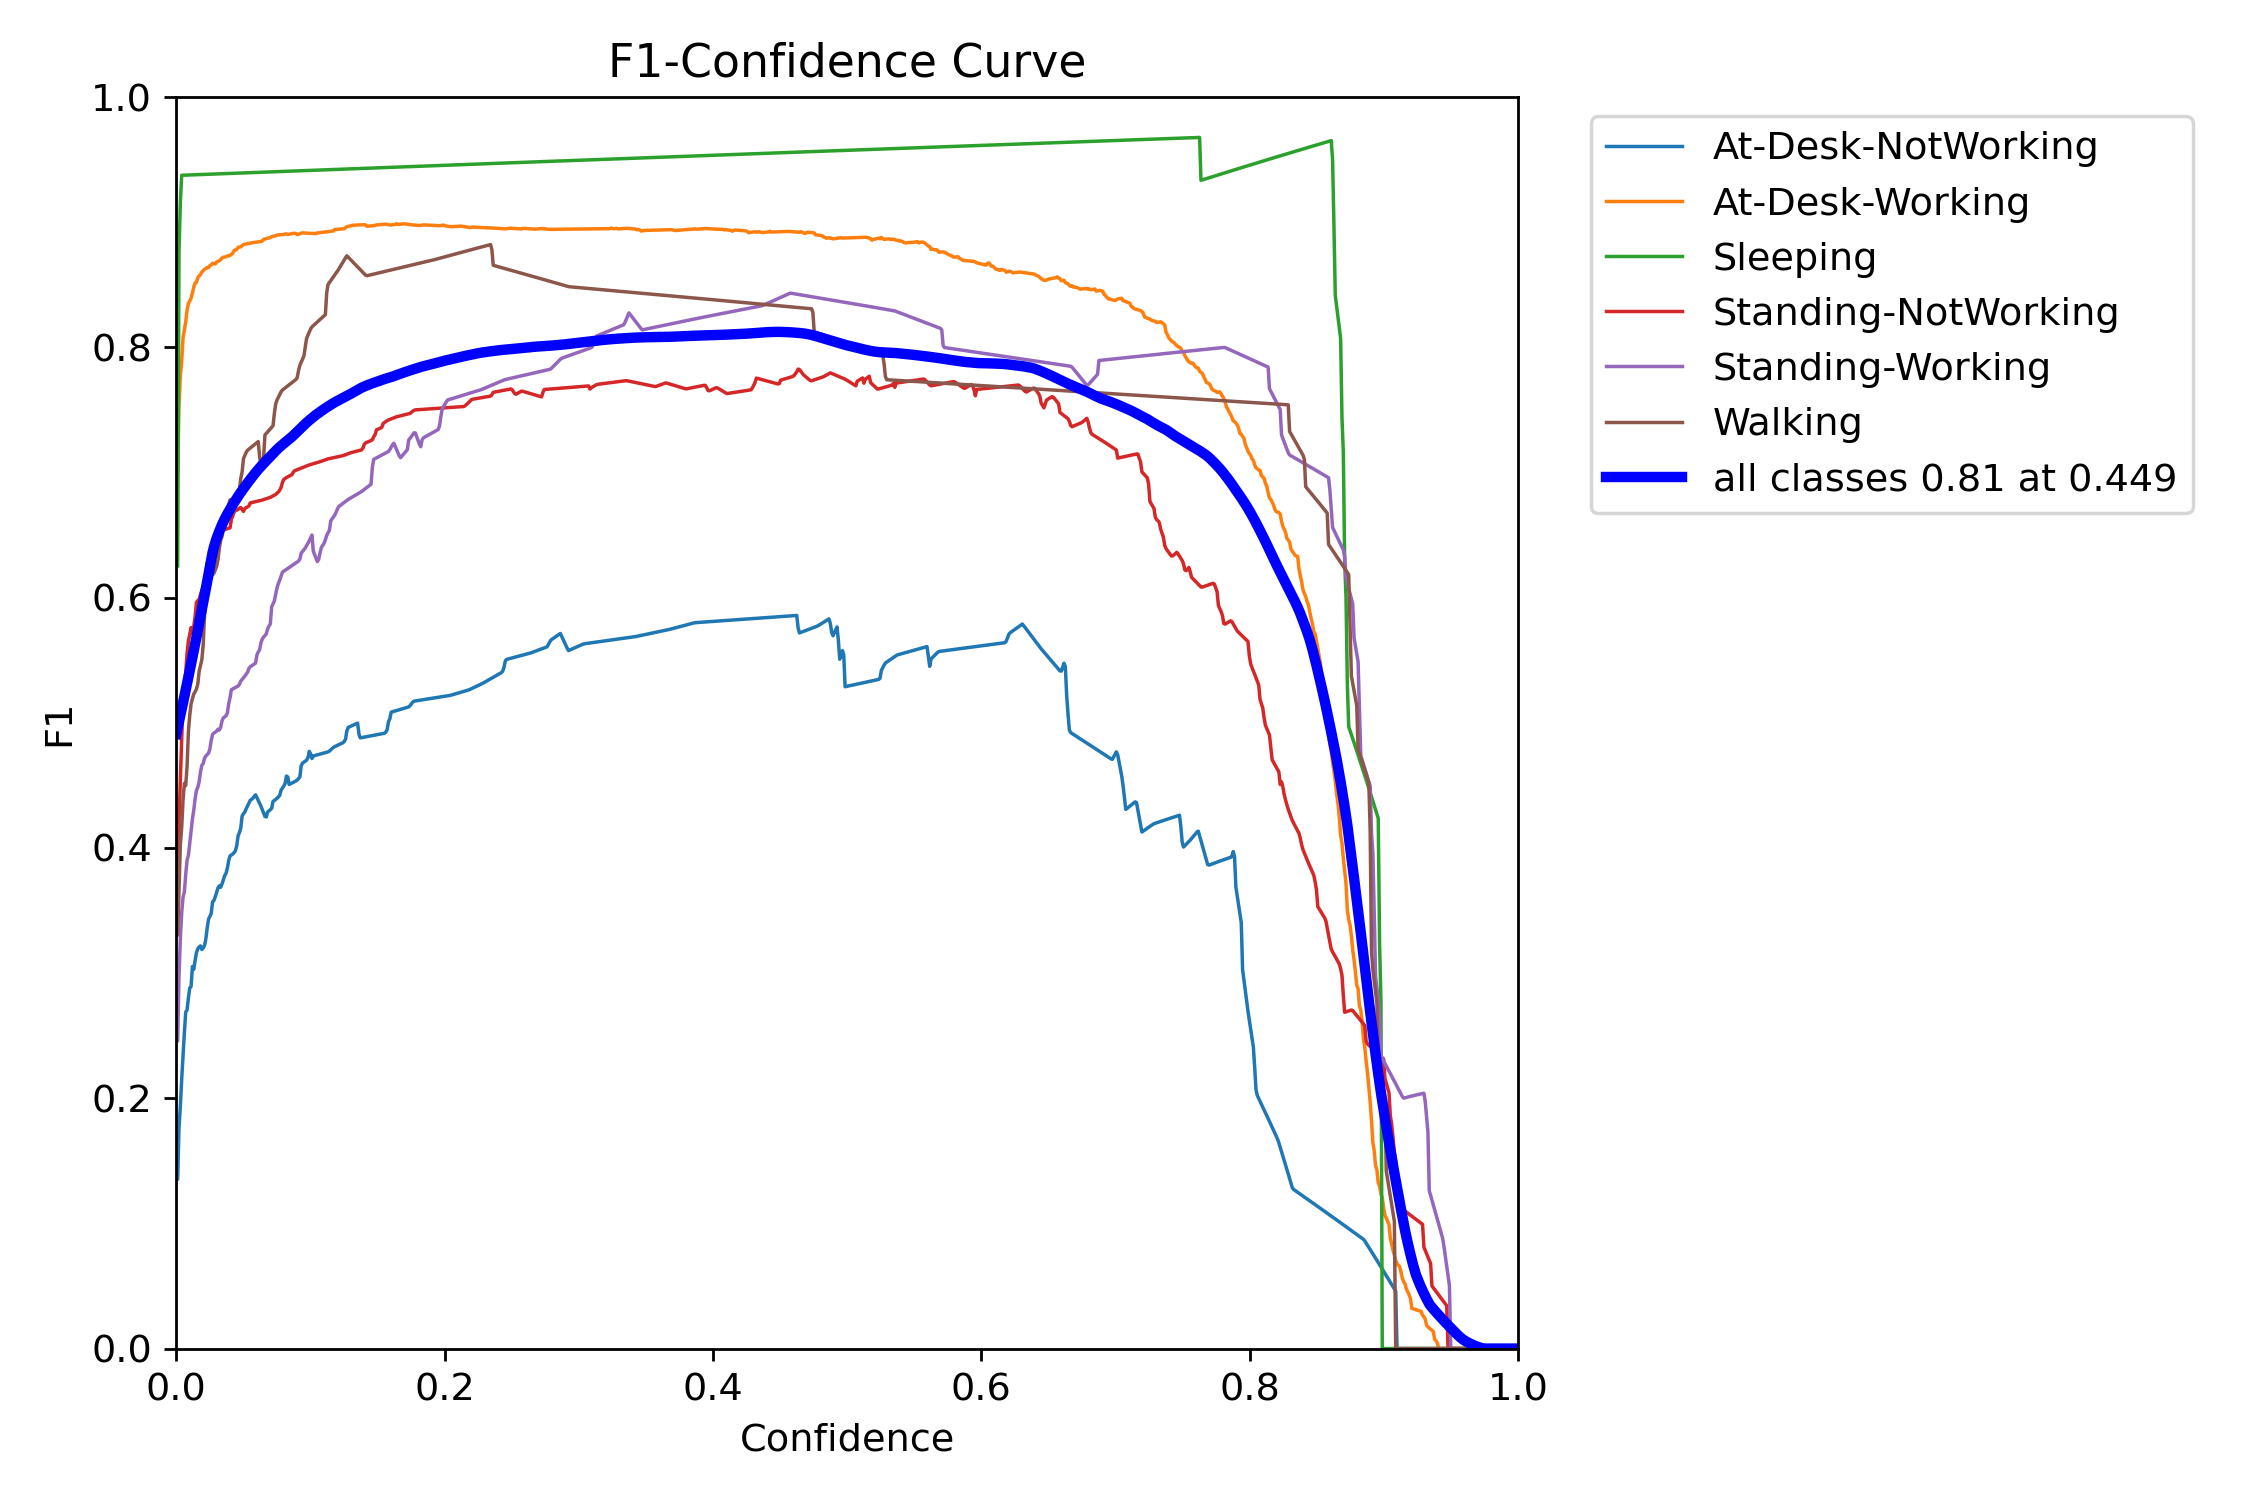

In [27]:
from PIL import Image
Image.open("/content/runs/detect/train2/F1_curve.png")

In [23]:
# Evaluate the model on the validation set
metricss = model.val(data='/content/Employee-Performance-Monitoring-4/data.yaml',device=device, verbose=False,imgsz=640,plots=True)
metricss

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Employee-Performance-Monitoring-4/valid/labels.cache... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]


                   all        209        988      0.812      0.822      0.854      0.585
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train24


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff0f432bb80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [24]:
metricss.confusion_matrix.matrix

array([[         26,          18,           0,           0,           0,           0,          20],
       [         15,         694,           0,           5,           2,           0,         107],
       [          0,           0,          15,           0,           0,           0,           1],
       [          2,           7,           0,         101,           2,          11,          26],
       [          0,           1,           0,           4,          35,           0,           8],
       [          0,           0,           0,           0,           0,          27,           1],
       [          1,          12,           0,           5,           5,           0,           0]])

In [21]:
df=pd.read_csv("/content/runs/detect/train2/results.csv")
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,105.283,1.86255,2.94886,1.59086,0.45434,0.28522,0.28007,0.14563,1.64735,2.57047,1.42338,0.000330,0.000330,0.000330
1,2,201.267,1.72762,2.01893,1.48991,0.62195,0.48621,0.47593,0.25774,1.61831,1.66186,1.41775,0.000657,0.000657,0.000657
2,3,294.882,1.67295,1.75323,1.43589,0.37288,0.36682,0.36628,0.18441,1.74156,1.60921,1.47906,0.000977,0.000977,0.000977
3,4,389.671,1.67702,1.62649,1.44320,0.57063,0.41549,0.49197,0.24117,1.73744,1.44033,1.50274,0.000970,0.000970,0.000970
4,5,484.444,1.64375,1.51828,1.41619,0.53465,0.54679,0.53651,0.27896,1.68972,1.53742,1.48907,0.000960,0.000960,0.000960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,9385.380,0.85339,0.47986,1.03055,0.75366,0.82748,0.83937,0.57033,1.22421,0.67089,1.26003,0.000060,0.000060,0.000060
96,97,9486.680,0.84809,0.47948,1.03045,0.75725,0.83425,0.84308,0.57297,1.22814,0.66989,1.26196,0.000050,0.000050,0.000050
97,98,9582.320,0.83804,0.47252,1.02516,0.78098,0.82010,0.84718,0.57523,1.22810,0.66534,1.26301,0.000040,0.000040,0.000040
98,99,9676.780,0.83796,0.47665,1.02291,0.77230,0.81499,0.84438,0.57667,1.22761,0.66451,1.25942,0.000030,0.000030,0.000030


In [25]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

# Assuming `metrics.confusion_matrix.matrix` is the confusion matrix and `classes` is the list of class names
cm = np.array(metricss.confusion_matrix.matrix)
class_names_without_bg = classes  # Adjust to exclude "Background" if needed

# Calculate support (number of true instances for each class)
support = cm.sum(axis=1).astype(int)  # Ensure support is an integer array

# Prepare true labels (y_true) based on the confusion matrix
# Each index represents a class, repeat each class index by its corresponding support value
y_true = np.concatenate([np.full(support[i], i) for i in range(len(support)) if support[i] > 0])

# Prepare predicted labels (y_pred) based on the confusion matrix
# Each predicted class will be created based on how many times it was predicted
y_pred = np.concatenate([np.full(cm[i, j].astype(int), j) for i in range(len(support)) for j in range(len(support)) if cm[i, j] > 0])

# Calculate precision, recall, F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred, labels=np.arange(len(class_names_without_bg)), average=None
)

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)

# Create a detection report dictionary
detection_report = {}
for i, class_name in enumerate(class_names_without_bg):
    detection_report[class_name] = {
        "Precision": precision[i],
        "Recall": recall[i],
        "F1 Score": f1[i],
        "Support": int(support[i])  # Ensure support is represented as an integer
    }

# Add overall accuracy to the report
detection_report["Overall Accuracy"] = accuracy

# Print detection report in a readable format
print("Detection Report:")
for label, metrics in detection_report.items():
    if label == "Overall Accuracy":
        print(f"{label}: {metrics:.2f}")
    else:
        print(f"Class '{label}':")
        for metric_name, metric_value in metrics.items():
            print(f"  {metric_name}: {metric_value:.2f}")

# Optional: create a DataFrame for a detailed display
report_df = pd.DataFrame(detection_report).T
print("\nDetailed Detection Report:")
print(report_df)


Detection Report:
Class 'At-Desk-NotWorking':
  Precision: 0.59
  Recall: 0.41
  F1 Score: 0.48
  Support: 64.00
Class 'At-Desk-Working':
  Precision: 0.95
  Recall: 0.84
  F1 Score: 0.89
  Support: 823.00
Class 'Sleeping':
  Precision: 1.00
  Recall: 0.94
  F1 Score: 0.97
  Support: 16.00
Class 'Standing-NotWorking':
  Precision: 0.88
  Recall: 0.68
  F1 Score: 0.77
  Support: 149.00
Class 'Standing-Working':
  Precision: 0.80
  Recall: 0.73
  F1 Score: 0.76
  Support: 48.00
Class 'Walking':
  Precision: 0.71
  Recall: 0.96
  F1 Score: 0.82
  Support: 28.00
Overall Accuracy: 0.78

Detailed Detection Report:
                     Precision    Recall  F1 Score     Support
At-Desk-NotWorking    0.590909  0.406250  0.481481   64.000000
At-Desk-Working       0.948087  0.843256  0.892605  823.000000
Sleeping              1.000000  0.937500  0.967742   16.000000
Standing-NotWorking   0.878261  0.677852  0.765152  149.000000
Standing-Working      0.795455  0.729167  0.760870   48.000000
Walkin

In [26]:
import numpy as np

# Assuming `metrics.confusion_matrix.matrix` is your confusion matrix
cm = np.array(metricss.confusion_matrix.matrix)

# Calculate total predictions
total_predictions = cm.sum()

# Calculate correct predictions (sum of the diagonal)
correct_predictions = cm.trace()  # or np.sum(np.diag(cm))

# Calculate accuracy
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


###